In [67]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [68]:
from ucimlrepo import fetch_ucirepo
import pandas as pd

# fetch dataset
magic_gamma_telescope = fetch_ucirepo(id=159)

# data (as pandas dataframes)
X = magic_gamma_telescope.data.features
y = magic_gamma_telescope.data.targets

# Combine features and target into one DataFrame
df = pd.concat([X, y], axis=1)

# Display the first few rows of the combined DataFrame
df.head()

,fLength,fWidth,fSize,fConc,fConc1,fAsym,fM3Long,fM3Trans,fAlpha,fDist,class
0,28.7967,16.0021,2.6449,0.3918,0.1982,27.7004,22.0110,-8.2027,40.0920,81.8828,g
1,31.6036,11.7235,2.5185,0.5303,0.3773,26.2722,23.8238,-9.9574,6.3609,205.2610,g
2,162.0520,136.0310,4.0612,0.0374,0.0187,116.7410,-64.8580,-45.2160,76.9600,256.7880,g
3,23.8172,9.5728,2.3385,0.6147,0.3922,27.2107,-6.4633,-7.1513,10.4490,116.7370,g
4,75.1362,30.9205,3.1611,0.3168,0.1832,-5.5277,28.5525,21.8393,4.6480,356.4620,g


In [69]:
from sklearn.preprocessing import LabelEncoder, StandardScaler

# Encode class label (optional for evaluation)
df["class_encoded"] = LabelEncoder().fit_transform(df["class"])

# Drop the original class label for clustering
X = df.drop(columns=["class", "class_encoded"])

# Standardize the features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)


### Clustering Based Anomaly Detection

In [70]:
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
from sklearn.metrics import davies_bouldin_score
from sklearn.metrics import calinski_harabasz_score

# Fit KMeans
kmeans1 = KMeans(n_clusters=2, random_state=42)
kmeans1.fit(X_scaled)
df["cluster"] = kmeans1.labels_

# Compute distance to cluster center
distances = np.min(kmeans1.transform(X_scaled), axis=1)

# Define threshold for anomaly detection (e.g., top 5% as anomalies)
threshold = np.percentile(distances, 95)
df["anomaly"] = (distances > threshold).astype(int)

# Summary
# print(df["anomaly"].value_counts())

# Evaluation metrics
silhouette_avg1 = silhouette_score(X_scaled, kmeans1.labels_)
davies_bouldin1 = davies_bouldin_score(X_scaled, kmeans1.labels_)
calinski_harabasz1 = calinski_harabasz_score(X_scaled, kmeans1.labels_)

print(f"Silhouette Score: {silhouette_avg1}")
print(f"Davies-Bouldin Score: {davies_bouldin1}")
print(f"Calinski-Harabasz Score: {calinski_harabasz1}")

Silhouette Score: 0.29431510605568456
Davies-Bouldin Score: 1.4403487439366485
Calinski-Harabasz Score: 7399.07813646978


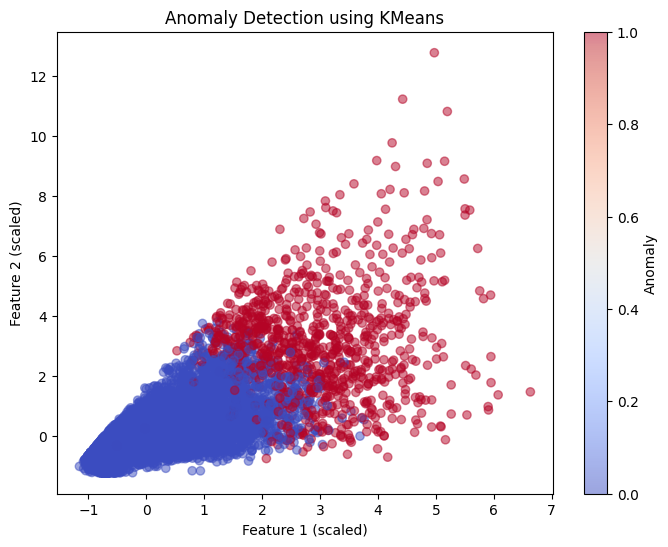

In [71]:
# Visualize
plt.figure(figsize=(8,6))
plt.scatter(X_scaled[:, 0], X_scaled[:, 1], c=df["anomaly"], cmap="coolwarm", alpha=0.5)
plt.title("Anomaly Detection using KMeans")
plt.xlabel("Feature 1 (scaled)")
plt.ylabel("Feature 2 (scaled)")
plt.colorbar(label="Anomaly")
plt.show()

### K Means Clustering

In [72]:
from sklearn.cluster import KMeans
from sklearn.metrics import adjusted_rand_score, normalized_mutual_info_score
from sklearn.decomposition import PCA

# Apply KMeans
kmeans2 = KMeans(n_clusters=3, random_state=42)
df["cluster"] = kmeans2.fit_predict(X_scaled)

# Evaluation
ari = adjusted_rand_score(df["class_encoded"], df["cluster"])
nmi = normalized_mutual_info_score(df["class_encoded"], df["cluster"])
print(f"Adjusted Rand Index: {ari:.4f}")
print(f"Normalized Mutual Info: {nmi:.4f}")

Adjusted Rand Index: 0.0694
Normalized Mutual Info: 0.0952


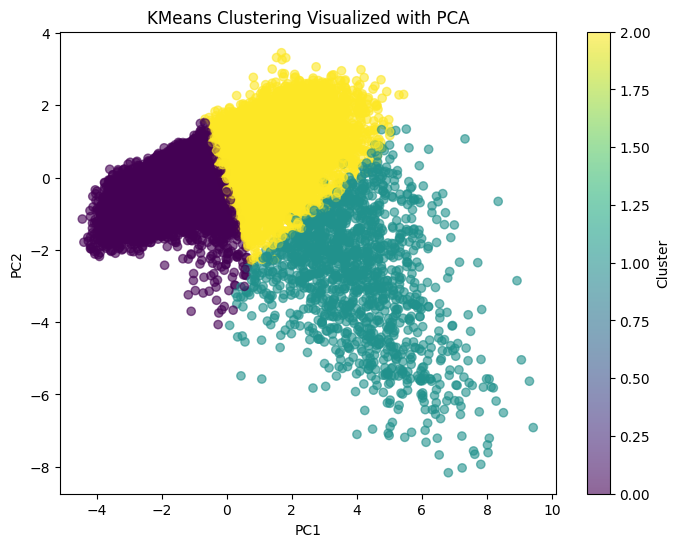

In [73]:

# PCA Visualization
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_scaled)

plt.figure(figsize=(8,6))
plt.scatter(X_pca[:,0], X_pca[:,1], c=df["cluster"], cmap='viridis', alpha=0.6)
plt.title("KMeans Clustering Visualized with PCA")
plt.xlabel("PC1")
plt.ylabel("PC2")
plt.colorbar(label="Cluster")
plt.show()

In [74]:
from sklearn.metrics import silhouette_score, davies_bouldin_score, calinski_harabasz_score

# Evaluation metrics
silhouette_avg2 = silhouette_score(X_scaled, kmeans2.labels_)
davies_bouldin2 = davies_bouldin_score(X_scaled, kmeans2.labels_)
calinski_harabasz2 = calinski_harabasz_score(X_scaled, kmeans2.labels_)

print(f"Silhouette Score: {silhouette_avg2}")
print(f"Davies-Bouldin Score: {davies_bouldin2}")
print(f"Calinski-Harabasz Score: {calinski_harabasz2}")

Silhouette Score: 0.2698539475946765
Davies-Bouldin Score: 1.4461549604716977
Calinski-Harabasz Score: 6333.291979416296


### Visualize

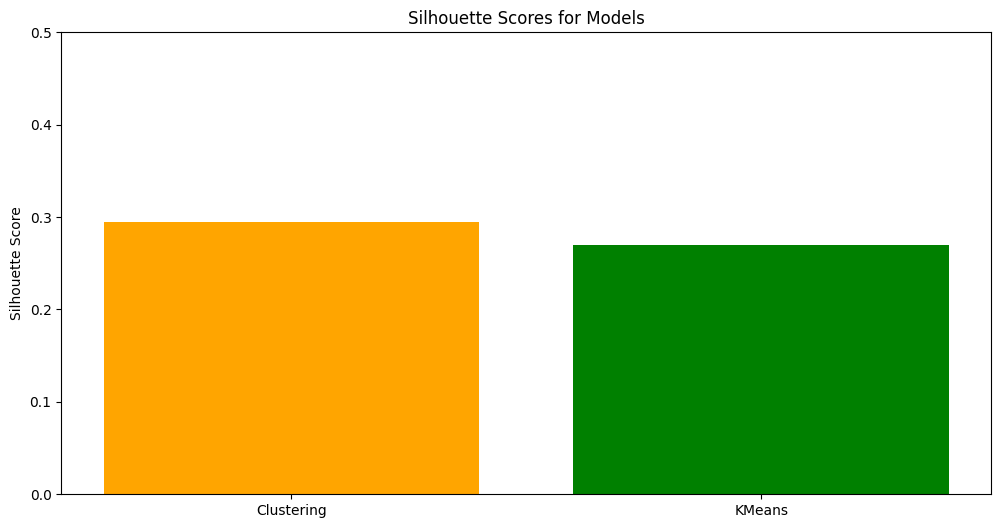

In [75]:
# Silhouette scores for both models
silhouette_scores = [silhouette_avg1, silhouette_avg2]
models = ['Clustering', 'KMeans']

# Plot
plt.figure(figsize=(12, 6))
plt.bar(models, silhouette_scores, color=['orange', 'green'])
plt.title('Silhouette Scores for Models')
plt.ylabel('Silhouette Score')
plt.ylim(0, 0.5)
plt.show()

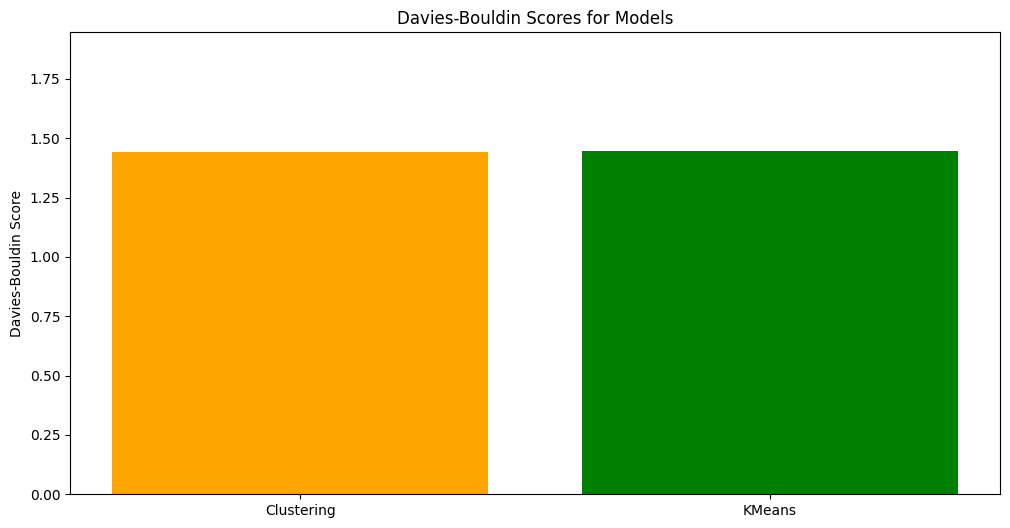

In [76]:
# Davies-Bouldin scores for both models
davies_bouldin_scores = [davies_bouldin1, davies_bouldin2]
models = ['Clustering', 'KMeans']

# Plot
plt.figure(figsize=(12, 6))
plt.bar(models, davies_bouldin_scores, color=['orange', 'green'])
plt.title('Davies-Bouldin Scores for Models')
plt.ylabel('Davies-Bouldin Score')
plt.ylim(0, max(davies_bouldin_scores) + 0.5)
plt.show()

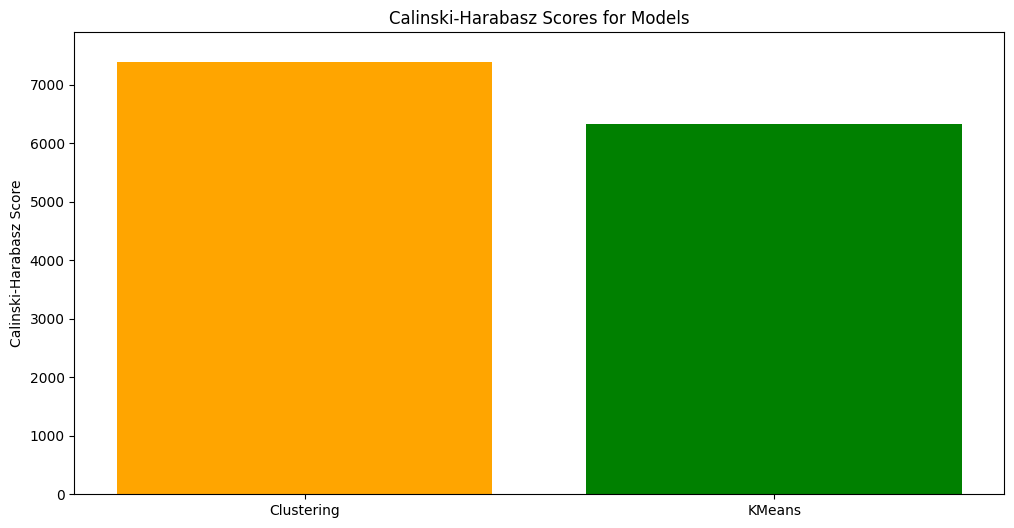

In [77]:
# Calinski-Harabasz scores for both models
calinski_harabasz_scores = [calinski_harabasz1, calinski_harabasz2]
models = ['Clustering', 'KMeans']

# Plot
plt.figure(figsize=(12, 6))
plt.bar(models, calinski_harabasz_scores, color=['orange', 'green'])
plt.title('Calinski-Harabasz Scores for Models')
plt.ylabel('Calinski-Harabasz Score')
plt.ylim(0, max(calinski_harabasz_scores) + 500)
plt.show()

To determine which model performed better, we can compare the evaluation metrics for both models:

1. **Silhouette Score**: Measures how similar an object is to its own cluster compared to other clusters. Higher is better.
    - Clustering: `0.2943`
    - KMeans: `0.2699`
    - **Winner**: Clustering (slightly better).

2. **Davies-Bouldin Score**: Measures the average similarity ratio of each cluster with the cluster most similar to it. Lower is better.
    - Clustering: `1.4403`
    - KMeans: `1.4462`
    - **Winner**: Clustering (slightly better).

3. **Calinski-Harabasz Score**: Measures the ratio of the sum of between-cluster dispersion to within-cluster dispersion. Higher is better.
    - Clustering: `7399.08`
    - KMeans: `6333.29`
    - **Winner**: Clustering (significantly better).

### Conclusion:
The **Clustering model** performed better overall based on the evaluation metrics. It achieved higher Silhouette and Calinski-Harabasz scores and a lower Davies-Bouldin score, indicating better-defined and more compact clusters.